<a href="https://colab.research.google.com/github/god-data-unimib/DS_LAB_ECONOMICS_FOR_DS/blob/main/Analisi_descrittiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import rcParams
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/god-data-unimib/DS_LAB_ECONOMICS_FOR_DS/main/dataset1/telecom_users.csv'

In [7]:
df1 = pd.read_csv(url, index_col=0)

In [9]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 1869 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object

In [40]:
df1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [42]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'],errors = 'coerce')

In [51]:
numerics = df1[['tenure', 'MonthlyCharges', 'TotalCharges']]

In [52]:
numerics

,tenure,MonthlyCharges,TotalCharges
1869,72,24.10,1734.65
4528,44,88.15,3973.20
6344,38,74.95,2869.85
6739,4,55.90,238.50
432,2,53.45,119.50
...,...,...,...
3772,1,95.00,95.00
5191,23,91.10,2198.30
5226,12,21.15,306.05
5390,12,99.45,1200.15


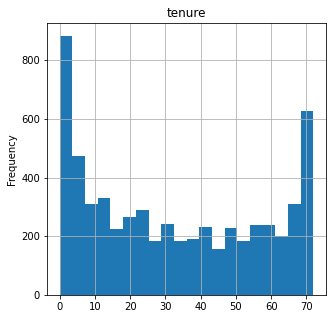

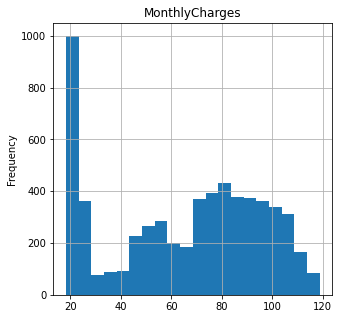

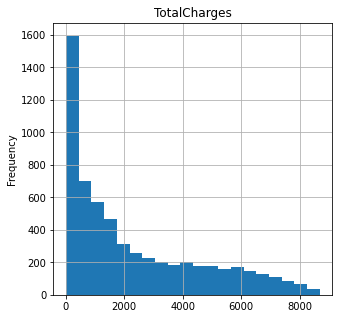

In [53]:
# plot numerical distributions
for f in numerics:
    df1[f].plot(kind='hist', bins=20)
    plt.title(f)
    plt.grid()
    plt.show()

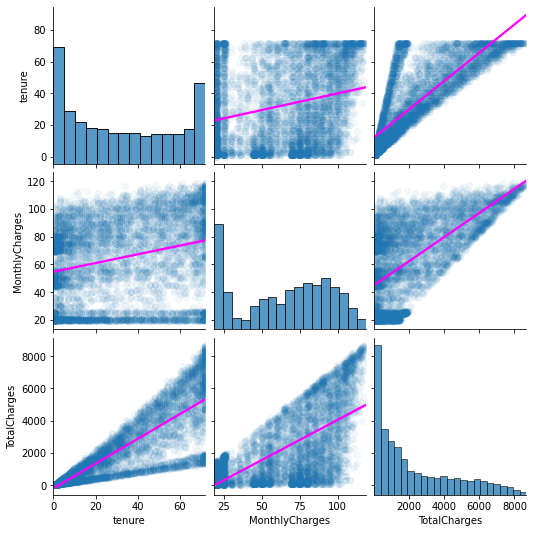

In [58]:
# pairwise scatter plot
sns.pairplot(numerics, 
             kind='reg', 
             plot_kws={'line_kws':{'color':'magenta'}, 'scatter_kws': {'alpha': 0.05}})
plt.show()

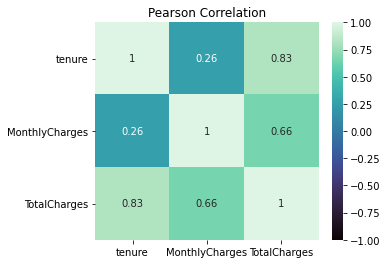

In [64]:
# Pearson (linear) correlation
corr_pearson = numerics.corr(method='pearson')

fig = plt.figure(figsize = (5,4))
sns.heatmap(corr_pearson, annot=True, cmap='mako', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')
plt.show()

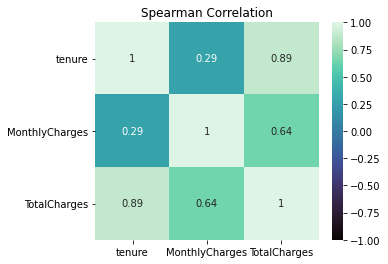

In [65]:
# Spearman (Rank) correlation
corr_spearman = numerics.corr(method='spearman')

fig = plt.figure(figsize = (5,4))
sns.heatmap(corr_spearman, annot=True, cmap='mako', vmin=-1, vmax=+1)
plt.title('Spearman Correlation')
plt.show()

In [24]:
yes = df1['Churn'].value_counts()
yes

No     4399
Yes    1587
Name: Churn, dtype: int64

In [38]:
# Data to plot
sizes = df1['Churn'].value_counts(sort = True)
colors = ["aquamarine","pink"] 
rcParams['figure.figsize'] = 5,5
explode = (0, 0.1)
labels = 'No', 'Yes'

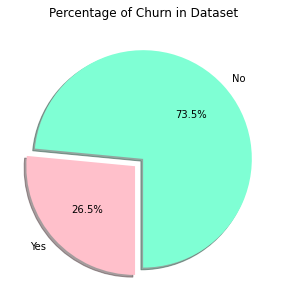

In [39]:
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()